# Begin Data Cleaning/Exploration

### Helpful Notes
* Pandas Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* Tutorial I'm loosely following: https://keras.io/examples/nlp/multimodal_entailment/
* ours is a multiclass problem involving four classes: mild dementia, moderate dementia, non demented, and very mild dementia

In [51]:
#Installs
#!pip install tensorflow
#!pip install tensorflow_hub
#!pip install tensorflow_text

In [52]:
# imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow import keras


## Prepare the Data

In [53]:
label_map = {'non_demented': 0, 
             'very_mild_dementia': 1,
             'mild_dementia': 2,
             'moderate_dementia' : 3
            }

### Build Data Frame for images (pathnames and category)

In [54]:
mild_dementia_path = r'./data/Data/Mild_Dementia'
moderate_dementia_path = r'./data/Data/Moderate_Dementia'
non_demented_path = r'./data/Data/Non_Demented'
very_mild_dementia_path = r'./data/Data/Very_Mild_Dementia'

In [55]:
mild_dementia_list = os.listdir(mild_dementia_path)
moderate_dementia_list = os.listdir(moderate_dementia_path)
non_demented_list = os.listdir(non_demented_path)
very_mild_dementia_list = os.listdir(very_mild_dementia_path)

# add label to each path by putting them in a dictionary
images_dict = {'image_path':[],'image_name':[],'label':[]}

for file in mild_dementia_list:
    images_dict['image_path'].append(mild_dementia_path + '/' + file)
    images_dict['image_name'].append(file)
    images_dict['label'].append('mild_dementia')

for file in moderate_dementia_list:
    images_dict['image_path'].append(moderate_dementia_path + '/' + file)
    images_dict['image_name'].append(file)
    images_dict['label'].append('moderate_dementia')
    
for file in non_demented_list:
    images_dict['image_path'].append(non_demented_path + '/' + file)
    images_dict['image_name'].append(file)
    images_dict['label'].append('non_demented')

for file in very_mild_dementia_list:
    images_dict['image_path'].append(very_mild_dementia_path + '/' + file)
    images_dict['image_name'].append(file)
    images_dict['label'].append('very_mild_dementia')
    
images_df = pd.DataFrame(data=images_dict)

images_df.head()

,image_path,image_name,label
0,./data/Data/Mild_Dementia/OAS1_0137_MR1_mpr-3_...,OAS1_0137_MR1_mpr-3_139.jpg,mild_dementia
1,./data/Data/Mild_Dementia/OAS1_0291_MR1_mpr-3_...,OAS1_0291_MR1_mpr-3_109.jpg,mild_dementia
2,./data/Data/Mild_Dementia/OAS1_0278_MR1_mpr-2_...,OAS1_0278_MR1_mpr-2_110.jpg,mild_dementia
3,./data/Data/Mild_Dementia/OAS1_0382_MR1_mpr-4_...,OAS1_0382_MR1_mpr-4_123.jpg,mild_dementia
4,./data/Data/Mild_Dementia/OAS1_0316_MR1_mpr-1_...,OAS1_0316_MR1_mpr-1_147.jpg,mild_dementia


label
non_demented          67222
very_mild_dementia    13725
mild_dementia          5002
moderate_dementia       488
Name: count, dtype: int64


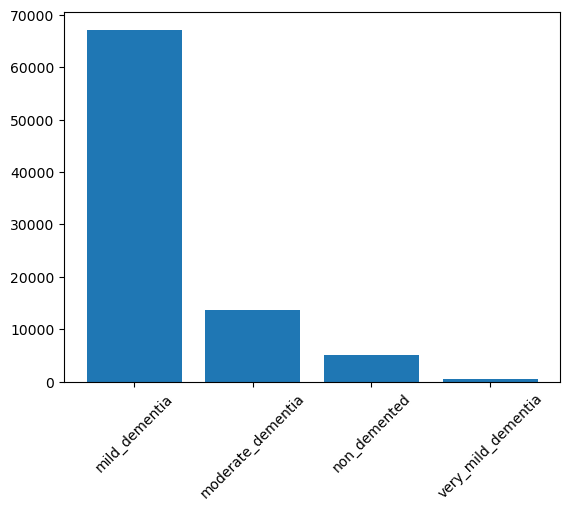

In [56]:
# plot distribution
plt.bar(images_df['label'].unique(),images_df['label'].value_counts())
plt.xticks(rotation=45)

print(images_df['label'].value_counts())

In [57]:
# create stratified split (takes representatives from each category)

images_df['label_idx'] = images_df['label'].apply(lambda x: label_map[x])

# 20% for test
train_df, test_df = train_test_split(images_df, test_size=0.2, 
                                     stratify=images_df['label'].values, 
                                     random_state=42)

### Preprocess Images
* How to label images in tf: https://stackoverflow.com/questions/37340129/tensorflow-training-on-my-own-image
* Flowers Labeling: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb

In [59]:
def dataframe_to_dataset(dataframe):
    columns = ["image_path", "label_idx"]
    dataframe = dataframe[columns].copy()
    labels = tf.constant(dataframe['label_idx'].values)
    paths = tf.constant(dataframe['image_path'].values)
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [67]:
def preprocess_image_from_path(x):
    
    resize = (128, 128)
    
    try: 
        image_string = tf.io.read_file(tf_tuple[0])
        image_decoded = tf.image.decode_jpeg(image_string, 3)
        image = tf.image.resize(image_decoded, resize)
    except:
        print("Error Processing Image")
        
    return image, x[1]

In [68]:
def prepare_dataset(dataframe):
    batch_size = 32
    auto = tf.data.AUTOTUNE
    
    ds = dataframe_to_dataset(dataframe)
    ds = ds.map(lambda x: preprocess_image_from_path(x))
    ds = ds.batch(batch_size).prefetch(auto)
    return ds

In [69]:
# # cleaned and prepared train and test
# train_ds = prepare_dataset(train_df)
test_ds  = prepare_dataset(test_df)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.<lambda>() takes 1 positional argument but 2 were given


In [65]:
# # View Dataset (DS)
list(test_ds.as_numpy_iterator())
# #list(train_ds.as_numpy_iterator())

for element in test_ds:
    print(type(element))
    print(element)

<class 'tuple'>


2024-04-07 13:09:15.799812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


TypeError: Cannot convert 0 to EagerTensor of dtype string

## Build Model

In [16]:
class_names = train_ds.class_names

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'